# Hallucination Detection with Graph Structures Dynamics

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")

## Dataset Generado

## Ground Truth Generado

In [145]:
csv_name = 'triviaqa_llama2_chat_7B_10batches_full.csv'
gt_df = pd.read_csv(csv_name)
gt_df.columns

Index(['question_id', 'bleurt_score', 'generated_answer', 'best_reference',
       'num_references', 'all_scores', 'min_score', 'avg_score'],
      dtype='object')

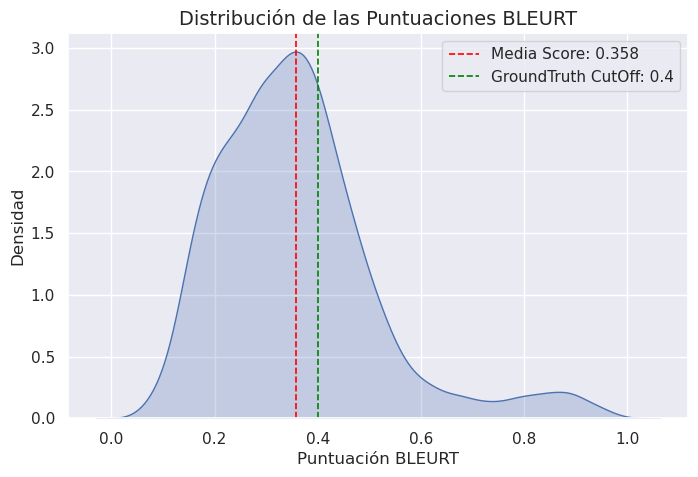

In [147]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(
    data=gt_df,
    x="bleurt_score",
    fill=True,
    ax=ax,
)
x_med = np.mean(gt_df['bleurt_score'])
ax.axvline(
    x=x_med,
    color='red',
    linestyle='--',
    linewidth=1.2,
    label=f'Media Score: {x_med:.3f}'
)

ax.axvline(
    x=.4,
    color='green',
    linestyle='--',
    linewidth=1.2,
    label=f'GroundTruth CutOff: {.4}'
)

ax.set_title('Distribución de las Puntuaciones BLEURT', fontsize=14)
ax.set_xlabel('Puntuación BLEURT', fontsize=12)
ax.set_ylabel('Densidad', fontsize=12)

plt.legend()
plt.show()

In [150]:
mask = (gt_df['bleurt_score'] > 0.9)
gt_df[mask].shape

(85, 8)

In [122]:
mask = (gt_df['bleurt_score'] > 0.2) & (gt_df['bleurt_score'] < 0.4)

df_samples = gt_df[mask].sample(n=10)

for index, row in df_samples.iterrows():
    print(f"Generado: {row['generated_answer']}\n"
          f"        Mejor Coincidencia: {row['best_reference']}\n"
          f"        Bleurt-20 Score: {row['bleurt_score']}")
    print("--------------------------------------------------")

Generado: Far from the Madding Crowd.
        Mejor Coincidencia: crowd
        Bleurt-20 Score: 0.2156491577625274
--------------------------------------------------
Generado: In America, the vegetable commonly known as a rutabaga is actually called a turnip.
        Mejor Coincidencia: Swede (disambiguation)
        Bleurt-20 Score: 0.2044038772583007
--------------------------------------------------
Generado: The video game "Manhunt 2" was banned in 2007 for its "unremitting bleakness and callousness."
        Mejor Coincidencia: Manhunt 2
        Bleurt-20 Score: 0.3107399344444275
--------------------------------------------------
Generado: Peter O’Sullevan was a BBC commentator for horse racing.
        Mejor Coincidencia: Horse Racing
        Bleurt-20 Score: 0.3181146085262298
--------------------------------------------------
Generado: Tsar Nicholas I of Russia called Ottoman Empire "the sick man of Europe".
        Mejor Coincidencia: Republic of Turkey
        Bleurt-20 Sco

In [151]:
csv_name = 'gt_llama2_chat_7B_improve_full.csv'
gt_df = pd.read_csv(csv_name)
gt_df.columns

Index(['question_id', 'bleurt_score', 'generated_answer', 'best_reference',
       'num_references', 'all_scores', 'min_score', 'avg_score'],
      dtype='object')

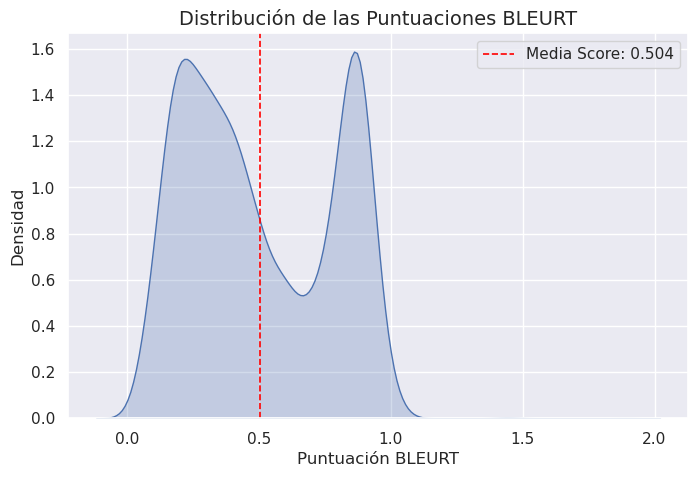

In [158]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(
    data=gt_df,
    x="bleurt_score",
    fill=True,
    ax=ax,
)
x_med = np.mean(gt_df['bleurt_score'])
ax.axvline(
    x=x_med,
    color='red',
    linestyle='--',
    linewidth=1.2,
    label=f'Media Score: {x_med:.3f}'
)

ax.set_title('Distribución de las Puntuaciones BLEURT', fontsize=14)
ax.set_xlabel('Puntuación BLEURT', fontsize=12)
ax.set_ylabel('Densidad', fontsize=12)

plt.legend()
plt.savefig('bleurt_distribution.png')
plt.show()

In [156]:
mask = (gt_df['bleurt_score'] > 0.4408)
gt_df[mask].shape

(4974, 8)

In [113]:
mask = (gt_df['bleurt_score'] > 0.3) & (gt_df['bleurt_score'] < 0.4)
mask = gt_df['question_id'] == 'qb_4612'

df_samples = gt_df[mask]#.sample(n=10)

for index, row in df_samples.iterrows():
    print(f"Generado: {row['generated_answer']}\n"
          f"        Mejor Coincidencia: {row['best_reference']}\n"
          f"        Bleurt-20 Score: {row['bleurt_score']}")
    print("--------------------------------------------------")

Generado: Ian Botham became the first cricketer to achieve this feat in a Test Match in June 1978.
        Mejor Coincidencia: Ian Botham
        Bleurt-20 Score: 0.3987431526184082
--------------------------------------------------


In [131]:
mask = (gt_df['bleurt_score'] > -0.5) & (gt_df['bleurt_score'] < 0.4)
mask = gt_df['question_id'] == 'qb_4612'

df_samples = gt_df[mask]#.sample(n=10)

for index, row in df_samples.iterrows():
    print(f"Generado: {row['generated_answer']}\n"
          f"        Mejor Coincidencia: {row['best_reference']}\n"
          f"        Bleurt-20 Score: {row['bleurt_score']}")
    print("--------------------------------------------------")

Generado: Ian Botham.
        Mejor Coincidencia: ian botham
        Bleurt-20 Score: 0.8121581673622131
--------------------------------------------------


In [143]:
mask = (gt_df['bleurt_score'] > 0.4) & (gt_df['bleurt_score'] < 0.6)

df_samples = gt_df[mask].sample(n=20)

for index, row in df_samples.iterrows():
    print(f"Generado: {row['generated_answer']}\n"
          f"        Mejor Coincidencia: {row['best_reference']}\n"
          f"        Bleurt-20 Score: {row['bleurt_score']}")
    print("--------------------------------------------------")

Generado: "Deep Throat."
        Mejor Coincidencia: deep throat
        Bleurt-20 Score: 0.426430881023407
--------------------------------------------------
Generado: "Mind the gap"
        Mejor Coincidencia: Mind the gap
        Bleurt-20 Score: 0.5243625044822693
--------------------------------------------------
Generado: A.A. Milne.
        Mejor Coincidencia: A. A. Milne
        Bleurt-20 Score: 0.5762317776679993
--------------------------------------------------
Generado: The Sea of Galilee.
        Mejor Coincidencia: sea of galilee
        Bleurt-20 Score: 0.4667310714721679
--------------------------------------------------
Generado: "Surfing."
        Mejor Coincidencia: surfing
        Bleurt-20 Score: 0.4852560758590698
--------------------------------------------------
Generado: " Édith Piaf"
        Mejor Coincidencia: édith piaf
        Bleurt-20 Score: 0.449599027633667
--------------------------------------------------
Generado: A corset.
        Mejor Coincidencia